In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


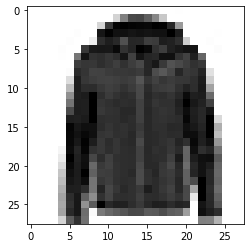

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

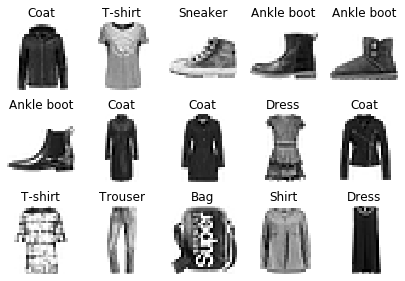

In [3]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [5]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 56us/sample - loss: 3.0510 - accuracy: 0.7036 - val_loss: 0.6613 - val_accuracy: 0.7794
Epoch 2/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5903 - accuracy: 0.7859 - val_loss: 0.5644 - val_accuracy: 0.8108
Epoch 3/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.5129 - accuracy: 0.8126 - val_loss: 0.5543 - val_accuracy: 0.8194
Epoch 4/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4716 - accuracy: 0.8283 - val_loss: 0.5164 - val_accuracy: 0.8294
Epoch 5/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4416 - accuracy: 0.8362 - val_loss: 0.5052 - val_accuracy: 0.8316
Epoch 6/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4184 - accuracy: 0.8451 - val_loss: 0.4774 - val_accuracy: 0.8370
Epoch 7/10
55000/55000 [==============================] -

In [9]:
history.history

{'loss': [3.0510111558437347,
  0.5902920374480161,
  0.5128947544141249,
  0.47155571693073617,
  0.4415506169015711,
  0.4183886681166562,
  0.40232222637913445,
  0.38761197767040945,
  0.376988753620061,
  0.3681945769483393],
 'accuracy': [0.70361817,
  0.7859455,
  0.8126364,
  0.8283273,
  0.8362182,
  0.8450909,
  0.8516727,
  0.85516363,
  0.8582182,
  0.8618182],
 'val_loss': [0.6613408413887024,
  0.5643718871831894,
  0.5542724521636962,
  0.516366895365715,
  0.50523395113945,
  0.47736577932834623,
  0.4722217985868454,
  0.4671000086069107,
  0.4702720987319946,
  0.4607850701570511],
 'val_accuracy': [0.7794,
  0.8108,
  0.8194,
  0.8294,
  0.8316,
  0.837,
  0.8402,
  0.8462,
  0.8422,
  0.8486]}

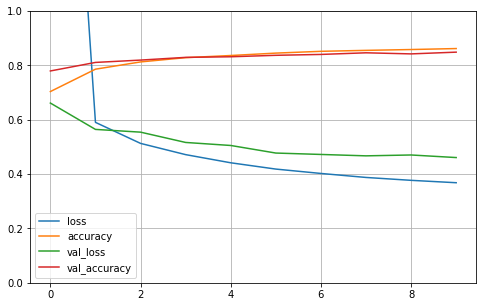

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

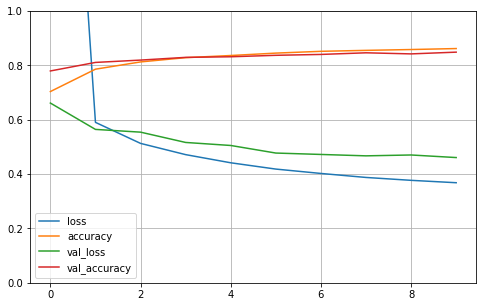

In [12]:
plot_learning_curves(history)

In [13]:
model.evaluate(x_test, y_test, verbose=0)

[0.4729952995300293, 0.8367]